In [6]:
%load_ext autoreload
%autoreload 2
TRAIN=True

import tensorflow as tf
from tensorflow  import keras
import tensorflow_hub as hub
import numpy as np

import librosa 
from dataset import WavDataset
from config import *
import matplotlib.pyplot as plt

import h5py
from pathlib import Path
from config import INTERMEDIATE, MODEL_DIR
import pickle
from tqdm import tqdm 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
hdf5_dataset = h5py.File(INTERMEDIATE / '22sr_samples.hdf5', 'r')
recordings = np.array(hdf5_dataset)

rec =  recordings[0]

annotated = [
    rec for rec in tqdm(recordings) if np.array(hdf5_dataset[rec]['Y']).sum() > 0
]
len(annotated), hdf5_dataset[rec]['X'].shape

  0%|          | 0/354 [00:00<?, ?it/s]

100%|██████████| 354/354 [01:52<00:00,  3.15it/s]


(101, (13200000,))

In [13]:
hdf5_dataset[rec]['Y'].shape

(4, 13200000)

In [34]:
rec =  annotated[0]
X, Y = hdf5_dataset[rec]['X'], hdf5_dataset[rec]['Y']
idxs = np.where(Y)[1]

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
 array([ 3675025,  3689105,  5901455,  5918087,  6009959,  6027911,
         6183935,  6199511,  6431039,  6448991,  6591023,  6608447,
         6899111,  6914686,  7183175,  7199015,  7549695,  7561135,
         7698415,  7713375,  7872655,  7886911,  7998847,  8014686,
         8129263,  8143695,  8258798,  8274463,  8436735,  8452457,
         8588799,  8606399,  8778791,  8795423,   353172,   363439,
          406265,   414479,   457892,   461705,  2301492,  2314399,
    

triangle_3khz


/tmp/ipykernel_41120/618456061.py:14: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  S = librosa.power_to_db(S)


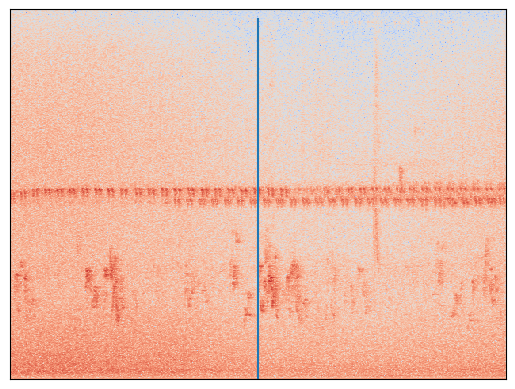

In [32]:
from util import DEFAULT_TOKENS

def around(sample, rec, SR=16_000, widen=10):
    y = hdf5_dataset[rec]['X']
    Y = hdf5_dataset[rec]['Y']
    
    y = y[sample - SR*widen : sample + SR*widen]
   
    labels = list(DEFAULT_TOKENS.keys())
    lab = labels[np.where(Y[:, sample])[0][0]]
    print(lab)
    
    S = librosa.stft(y)
    S = librosa.power_to_db(S)
    librosa.display.specshow(S)
    
    plt.vlines(librosa.samples_to_frames(SR*widen), ymin=0, ymax=1000) # start of frame
    plt.show()
  
around(3675065, rec)  

/tmp/ipykernel_41120/14189074.py:11: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  S = librosa.power_to_db(S)


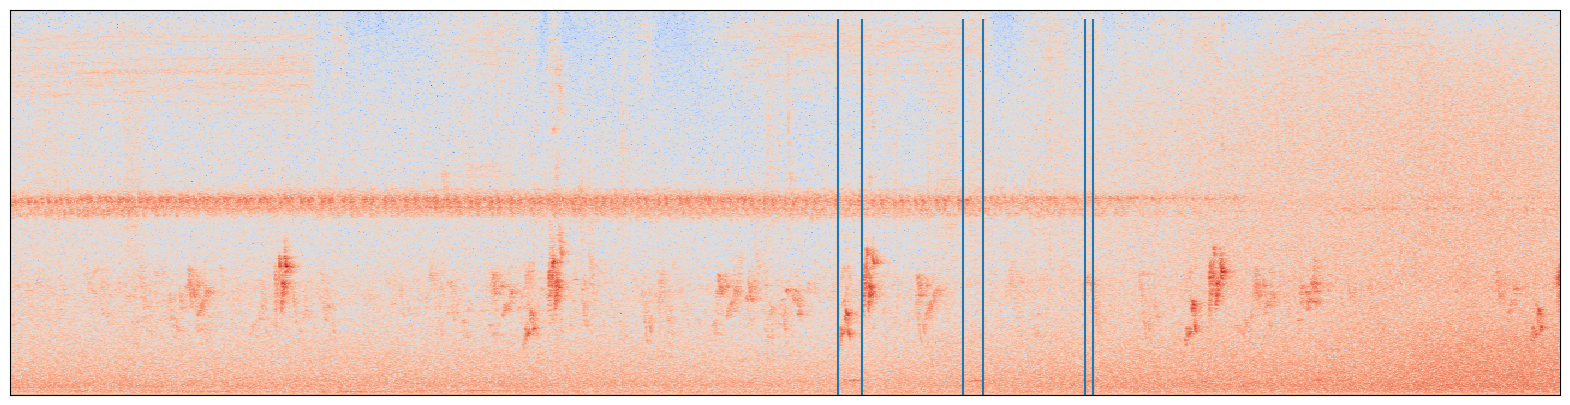

In [41]:
def view_annotations(samples, Y):
    sr = 22_000
    c = 30 * sr
    
    for start_sample in range(0, len(samples), c):
        chunk = samples[start_sample: start_sample + c]
        Y_chunk = Y[:, start_sample: start_sample + c]
        plt.figure(figsize=(20, 5))
        
        S = librosa.stft(chunk)
        S = librosa.power_to_db(S)
        librosa.display.specshow(S)
        
        label_idxs, sample_idxs = np.where(np.diff(Y_chunk))
        for l, s in zip(label_idxs, sample_idxs):
            labels = list(DEFAULT_TOKENS.keys())
            lab = labels[l]
            cols = {
                
            }
            plt.vlines(librosa.samples_to_frames(s), ymin=0, ymax=1000) 
        
        plt.show()
        
samples = hdf5_dataset[rec]['X']
Y = hdf5_dataset[rec]['Y']     
view_annotations(samples, Y)